#Importando as bibliotecas e baixando os csv


In [3]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit,cross_val_score,GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Autenticação para acesso aos dados
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download dos dados para esta máquina virtual
downloaded_x = drive.CreateFile({'id': '1mSK8aWmRaKzNaVBoD7pcSKBYgrVpoHp9'})
downloaded_y = drive.CreateFile({'id': '13VTSWG8hZFMwKLV_tdYSfJeS5qG56wK8'})
downloaded_x_anomes_11 = drive.CreateFile({'id': '1IJDsIW-Owa7kyHBSfOBKH9qSqWRhI5vF'})
downloaded_y_anomes_11 = drive.CreateFile({'id': '16TzXnUacl4Rug565oPgxTiFmMgbDCLwS'})
downloaded_x.GetContentFile('x_final.csv')
downloaded_y.GetContentFile('y_final.csv')
downloaded_x_anomes_11.GetContentFile('x_anomes11.csv') 
downloaded_y_anomes_11.GetContentFile('y_anomes11.csv') 

In [5]:
# Carregando os dados baixados em um dataframe 
x = pd.read_csv('x_final.csv')
y = pd.read_csv('y_final.csv')
x_anomes_11 = pd.read_csv('x_anomes11.csv')
y_anomes_11 = pd.read_csv('y_anomes11.csv')

In [6]:
# limpando as colunas
x = x.drop(columns=["Unnamed: 0"])
y = y.drop(columns=["Unnamed: 0"])
x_anomes_11 = x_anomes_11.drop(columns=["Unnamed: 0", "num_atend_atrs", "num_atend", "qtd_reclm", "cod_rating"])
y_anomes_11 = y_anomes_11.drop(columns=["Unnamed: 0"])

#Instanciar o modelo

In [7]:
# instanciando o algoritimo do modelo com os parâmetros decididos previamente
modelo = RandomForestClassifier(bootstrap=True,
 max_depth=None,
 min_samples_leaf=8,
 min_samples_split=2,
 n_estimators=80,
 n_jobs=-1,
 random_state=42)

#Análise gráfica do modelo

In [8]:
from sklearn.model_selection import (train_test_split, cross_val_score)

In [9]:
# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, 
                                                    random_state = 42)

In [10]:
rfc2 = RandomForestClassifier(bootstrap=True,
 max_depth=None,
 min_samples_leaf=8,
 min_samples_split=2,
 n_estimators=80,
 n_jobs=-1,
 random_state=42)

rfc2.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=80, n_jobs=-1,
                       random_state=42)

In [11]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay, accuracy_score)

In [12]:
y_pred2 = rfc2.predict(x_test)

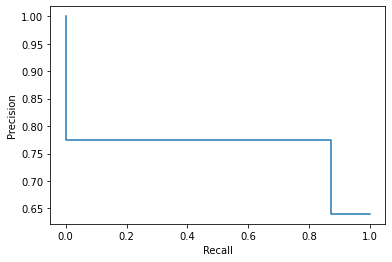

In [13]:
precision, recall, _ = precision_recall_curve(y_test, y_pred2)

display = PrecisionRecallDisplay(precision=precision, recall=recall)

display.plot()

In [25]:
from sklearn.metrics import (classification_report, plot_roc_curve, plot_confusion_matrix, recall_score, precision_score)

In [28]:
recall = recall_score(y_test,y_pred2)
precision = precision_score(y_test,y_pred2)


recall

0.8725185933339454

In [29]:
precision

0.7744706515183621

In [15]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.71      0.55      0.62     30620
         1.0       0.77      0.87      0.82     54455

    accuracy                           0.76     85075
   macro avg       0.74      0.71      0.72     85075
weighted avg       0.75      0.76      0.75     85075



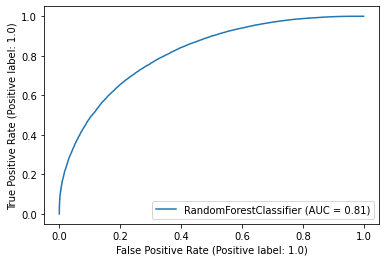

In [16]:
plot_roc_curve(rfc2, x_test, y_test)

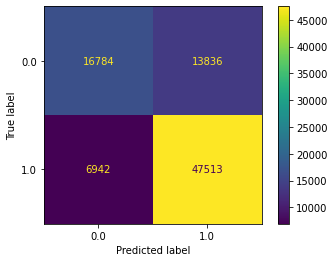

In [17]:
matrix_c = plot_confusion_matrix(rfc2, x_test, y_test)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
score_f1 = cross_val_score(rfc2, x, y, scoring="f1")

In [24]:
score_f1.mean()

0.8219978673589419

#Teste do modelo na base de dados de um único mês

In [18]:
# treinando o modelo com a base de dados com os dados agregados
modelo.fit(x, y)

RandomForestClassifier(min_samples_leaf=8, n_estimators=80, n_jobs=-1,
                       random_state=42)

In [19]:
# realizando o predict do anomes 11
y_pred = modelo.predict(x_anomes_11)

In [20]:
# avaliando o predict do modelo com os valores reais
f1_score(y_anomes_11, y_pred)

0.07968330558292841